# <center> Exploratory Data Analysis - CardioGoodFitness.csv</center>

## Dataset Information
The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables:-
- Product - the model no. of the treadmill
- Age - in no of years, of the customer
- Gender - of the customer
- Education - in no. of years, of the customer
- Marital Status - of the customer
- Usage - Avg. # times the customer wants to use the treadmill every week
- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
- Income - of the customer
- Miles- expected to run


## Objective
- Come up with a customer profile (characteristics of a customer) of the different products
- Perform uni-variate and multi-variate analyses
- Generate a set of insights and recommendations that will help the company in targeting new customers

## Project Code  & Exploratory Data Analysis (EDA) of CardioGoodFitness.csv

### Inorder to perform EDA, lets us first load the neccessary Python Libraries

In [1]:
# Import of libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Load CardioGoodFitness.csv dataset as Pandas DataFrame

In [2]:
#Load CardioGoodFitness.csv dataset
data = pd.read_csv("CardioGoodFitness.csv")

### Basic Dataset Details

#### Number of rows and columns present in the dataset

In [3]:
data.shape

(180, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.7+ KB


In [5]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [6]:
data.duplicated().sum()

0

**Observation**: There are 180 rows and 9 columns with no missing values and duplicate record

#### List of column along with their datatypes

In [7]:
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

**Observation**: Project, Gender and MaritalStatus is of type object

##### Identifying actual datatype of column Product

In [8]:
type(data['Product'][0])

str

**Observation**: Project column is of type string

##### Identifying actual datatype of column Gender

In [9]:
type(data['Gender'][0])

str

**Observation**: Gender column is of type string

##### Identifying actual datatype of column MaritalStatus

In [10]:
type(data['MaritalStatus'][0])

str

**Observation**: MaritalStatus column is of type string

#### Sample Data Preview 

In [11]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [12]:
data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


### Basic Data Analysis

#### Change string column type to category

In [13]:
data['Product'] = data['Product'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['MaritalStatus'] = data['MaritalStatus'].astype('category')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null category
Age              180 non-null int64
Gender           180 non-null category
Education        180 non-null int64
MaritalStatus    180 non-null category
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: category(3), int64(6)
memory usage: 9.3 KB


#### Basic Statistical information about the dataset

In [15]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Observation**:-
- Customer age is between 28-50, average age is 28.78, median is 26 and maximum age is 50
- Customer education is between 12-21 years.
- Average Treadmill usage pattern is 3 times a week, with a minimum of 2 times and maximum 7 times a week
- Average Self rated fitness score of the customer is 3.
- Average income of 53719.58, median is 50596.50, maximum is 104581.00 and around 50% of customers has income between 44-58K (ie. customers income between Q1 and Q3).
- Customer average expects to runs is 103.19 miles/week and median 94 miles/week and around 50% of the customers expects to runs between 66 - 114 miles (ie. customers miles between Q1 and Q3).

#### Uni-variate Analyses

In [16]:
### Reuseable methods for drawing graphs


# Adds mean, median and mode line to the graph
def addGrapVLines(columnName,plot, title):
    plot.axvline(data[columnName].mean(), color='lightgreen', linestyle='-',linewidth=1)
    plot.axvline(data[columnName].median(), color='red', linestyle='--',linewidth=2)
    plot.axvline(data[columnName].mode()[0], color='orange', linestyle='-',linewidth=1)
    plot.legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    plot.set(title=title)
    
# Prints mean, mediam and mode report of data for a column    
def statReport(columnName):
    datavalue=data[columnName]
    analysisReport ="Mediam={median}, Mean={mean} and Mode={mode}".format(median = datavalue.median(), mean = datavalue.mean(), mode=datavalue.mode()[0])
    print(analysisReport)
    
# Draws three different types of graph (boxplot,distplot,violinplot) togather 
def drawGraph(columnName):
    fig, axes = plt.subplots(ncols=3,figsize=(20, 5))

    
    plot=sns.boxplot(data[columnName],showmeans=True, data=data, ax=axes[0])
    addGrapVLines(columnName,plot,"Data distribution and skewness for '"+columnName+"'")
    
    plot=sns.distplot(data[columnName],ax=axes[1],hist=True)
    addGrapVLines(columnName,plot," Variation in the data distribution for '"+columnName+"'")
    
    plot=sns.violinplot(data[columnName],showmeans=True,ax=axes[2])
    addGrapVLines(columnName,plot,"Data Distribution for '"+columnName+"'")
    
# Draws Count plot for a particular column    
def drawCountPlot(columnName,axes):
    dataPoints=data[columnName]
    indexCount = dataPoints.value_counts().index
    ax = sns.countplot(dataPoints, order=indexCount ,ax=axes)
    for patch in ax.patches:
        percentage = 100 * (patch.get_height()*1.0)/dataPoints.count()
        x = patch.get_x() + patch.get_width() / 2 - 0.05 
        y = patch.get_y() + patch.get_height()
        ax.annotate("{percent:.2f}".format(percent=percentage)+"%", (x, y)) 
        
# Draws CatPlot plot for a particular column      
def drawCatPlot(xColumnName,yColumnName, data, hueColumn,axes):
    sns.catplot(y=xColumnName,x=yColumnName,hue=hueColumn,kind="bar", data=data, ci=None,ax=axes); 
    plt.close(2)
    
# Draws Box plot for a particular column      
def drawBoxPlot(xColumnName,yColumnName, data,axes):
    sns.boxplot(data[xColumnName],data[yColumnName],ax=axes)
    plt.close(2)

#### Numerical Field Analysis

#### 1. Income

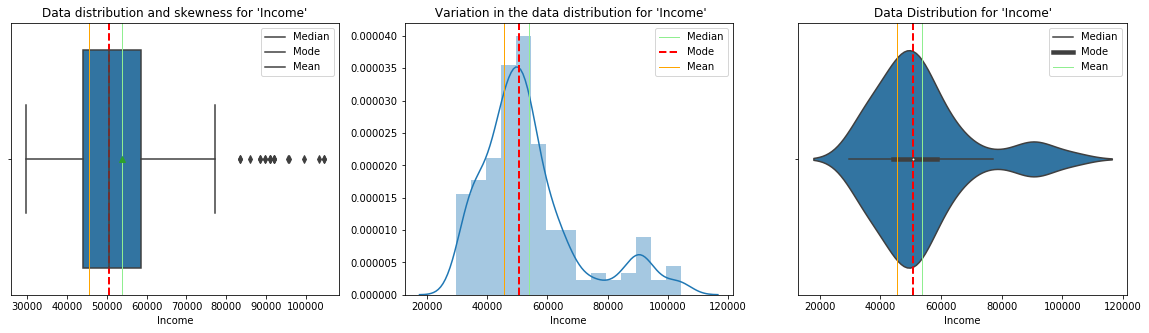

In [17]:
drawGraph('Income')

In [18]:
statReport('Income')

Mediam=50596.5, Mean=53719.5777778 and Mode=45480


**Observation**:-
- Income Median is 50K , Mean is 54k and mode is $45K.
- Very less percentage of customers is in the higher income range
- There are some customers with outlier income (i.e 80K+)
- Data has positive-skew distributions

#### 2. Fitness

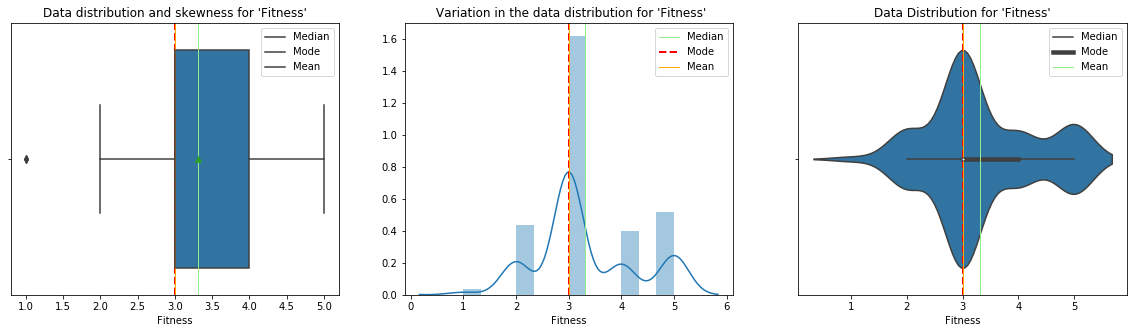

In [19]:
drawGraph('Fitness')

In [20]:
statReport('Fitness')

Mediam=3.0, Mean=3.31111111111 and Mode=3


**Observation**:-
- Most common fitness rating given by customers is 3

#### 3. Age

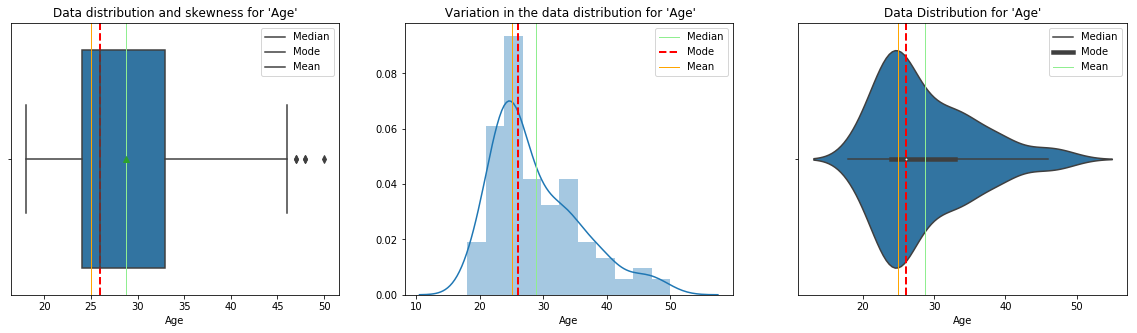

In [21]:
drawGraph('Age')

In [22]:
statReport('Age')

Mediam=26.0, Mean=28.7888888889 and Mode=25


**Observation**:-
- Mostly younger age group is buying trademill
- 35+ age customer is very less
- Data has positive-skew distributions

#### 4. Education

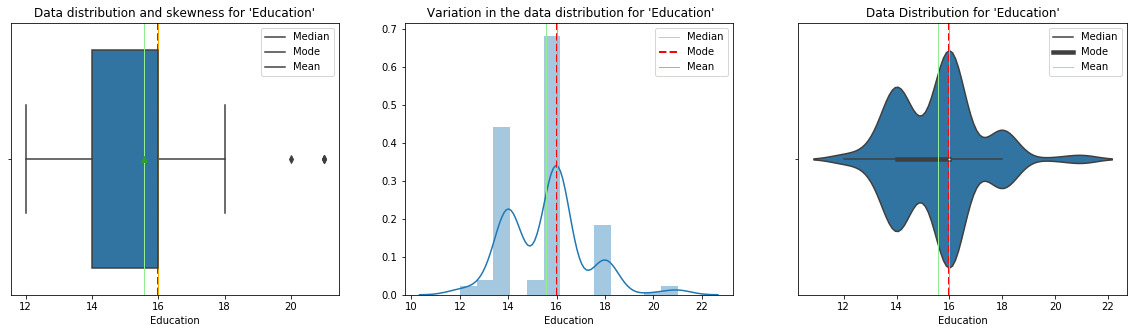

In [23]:
drawGraph('Education')

In [24]:
statReport('Education')

Mediam=16.0, Mean=15.5722222222 and Mode=16


**Observation**:-
- Most custumers has atleast 16 yrs of education
- Very few customers with 20+ yrs of education

#### 5. Usage

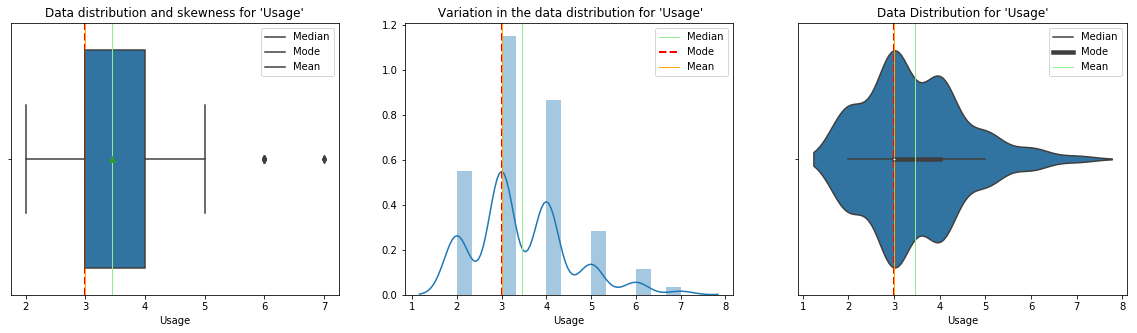

In [25]:
drawGraph('Usage')

In [26]:
statReport('Usage')

Mediam=3.0, Mean=3.45555555556 and Mode=3


**Observation**:-
- Most custumers has used trademill atleast 3 times a week
- Very few customers is using trademill 6-7 times a week. 

#### 6. Miles

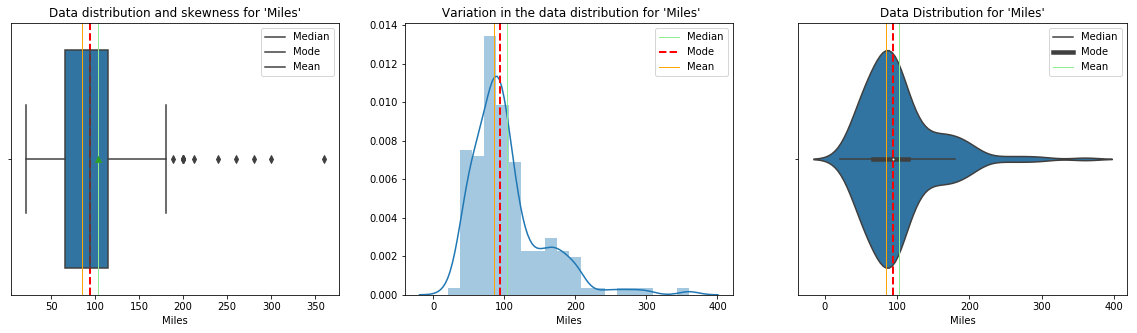

In [27]:
drawGraph('Miles')

In [28]:
statReport('Miles')

Mediam=94.0, Mean=103.194444444 and Mode=85


**Observation**:-
- Most custumers is running 85 miles per week
- Data has positive-skew distributions 

#### Categorical Field Analysis

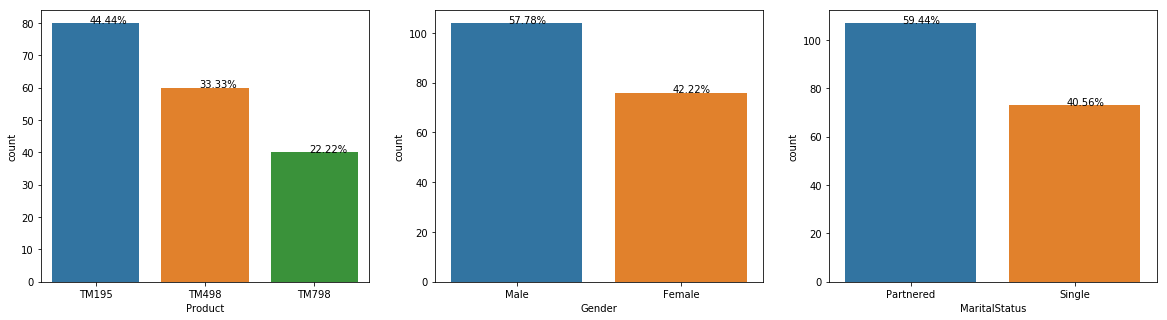

In [29]:
fig, axes = plt.subplots(ncols=3,figsize=(20, 5))
drawCountPlot('Product',axes[0])
drawCountPlot('Gender',axes[1])
drawCountPlot('MaritalStatus',axes[2])

**Observation**:-
- Most bought Product is TM195
- Most of the Trademil is bought by Partnered Customers, ie. 59% customer is Partnered.
- Male customers uses trademill more than female customers

#### Bi-variate & Multi-variate Analyses

#### Understading correlation between Prodcut and Gender

In [30]:
pd.crosstab(data["Product"],data["Gender"])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


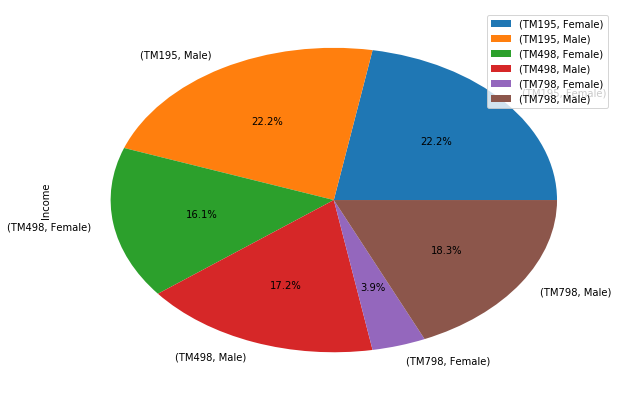

In [31]:
data.groupby(['Product','Gender']).count().plot(kind='pie',y=['Income'],subplots=True,
figsize=(10,7), autopct='%1.1f%%');

#### Understading correlation between Prodcut and Income

In [32]:
dGrpByProduct=data.groupby('Product', as_index=False)['Income'].mean()
dGrpByProduct

,Product,Income
0,TM195,46418.025
1,TM498,48973.650
2,TM798,75441.575


In [33]:
dGrpByProduct=data.groupby('Product', as_index=False)['Age'].mean()
dGrpByProduct

,Product,Age
0,TM195,28.55
1,TM498,28.90
2,TM798,29.10


#### Understading correlation between Prodcut with Income, Age, Miles, Usage, Fitness

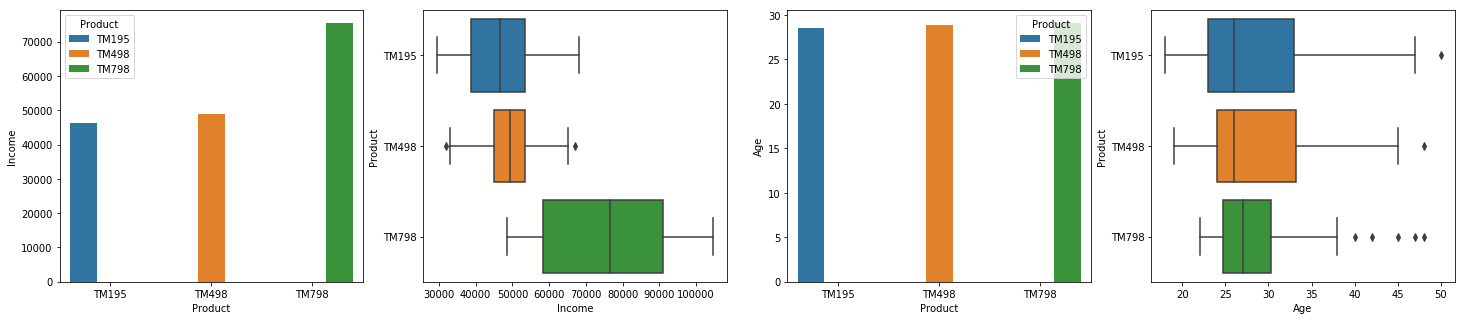

In [34]:
fig, axes = plt.subplots(ncols=4,figsize=(25, 5))
drawCatPlot('Income','Product', data, 'Product',axes[0])
drawBoxPlot('Income','Product',data,axes[1])
drawCatPlot('Age','Product', data, 'Product',axes[2])
drawBoxPlot('Age','Product',data,axes[3])

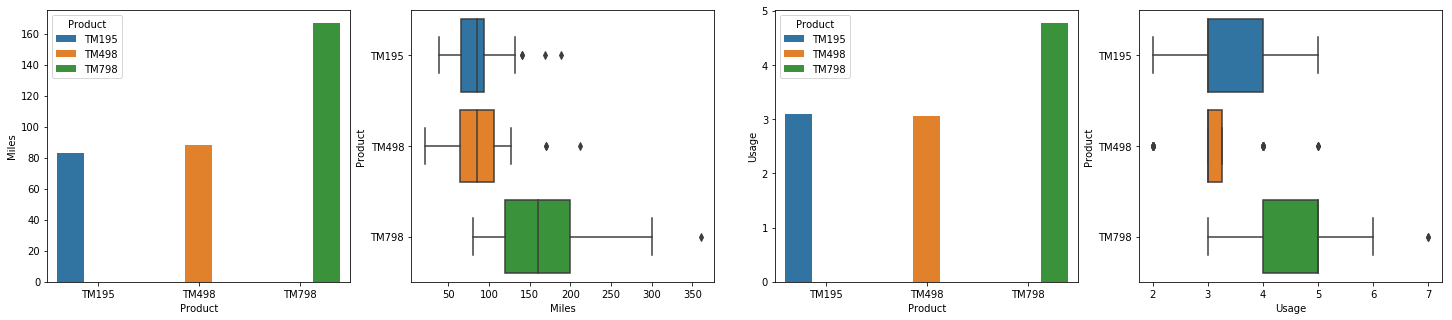

In [35]:
fig, axes = plt.subplots(ncols=4,figsize=(25, 5))
drawCatPlot('Miles','Product', data, 'Product',axes[0]) 
drawBoxPlot('Miles','Product',data,axes[1])
drawCatPlot('Usage','Product', data, 'Product',axes[2])
drawBoxPlot('Usage','Product',data,axes[3])

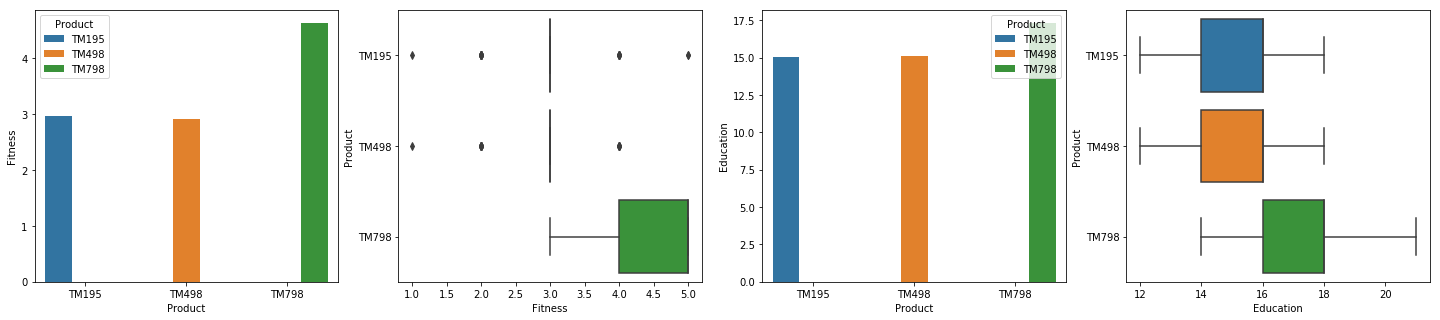

In [36]:
fig, axes = plt.subplots(ncols=4,figsize=(25, 5))
drawCatPlot('Fitness','Product', data, 'Product',axes[0])
drawBoxPlot('Fitness','Product',data,axes[1])
drawCatPlot('Education','Product', data, 'Product',axes[2])
drawBoxPlot('Education','Product',data,axes[3])

**Observation**:-
- Product TM798 is used by many outliers customers of age more than 38+
- Product TM798 has high prices and provides better fittness and major.
- Product TM195 and TM498 is mosltly bought by customers age between 22-33 and  TM798 is bought by customers age betwwen 25-30
- Most used Product is TM195 and its usage pattern is atlest 3days/ week 
- Least used Product is TM798
- Product TM195 is used equally by both Male and Female
- TM798 is less used by Female
- TM798 is used by customers whose income is over 70K
- TM798 has most runs in terms of miles (160+ miles/per day) on it
- TM798 is used 4+ days/ week by customers. ie. Customers who buy TM798 uses it more frequently and have higer fittnes.
- TM195 and TM498 fittness level is 3
- TM798 is mostly used by customers with atleast 16yrs of education

#### Understading correlation between Gender with Income, Age, Miles, Usage, Fitness, Education

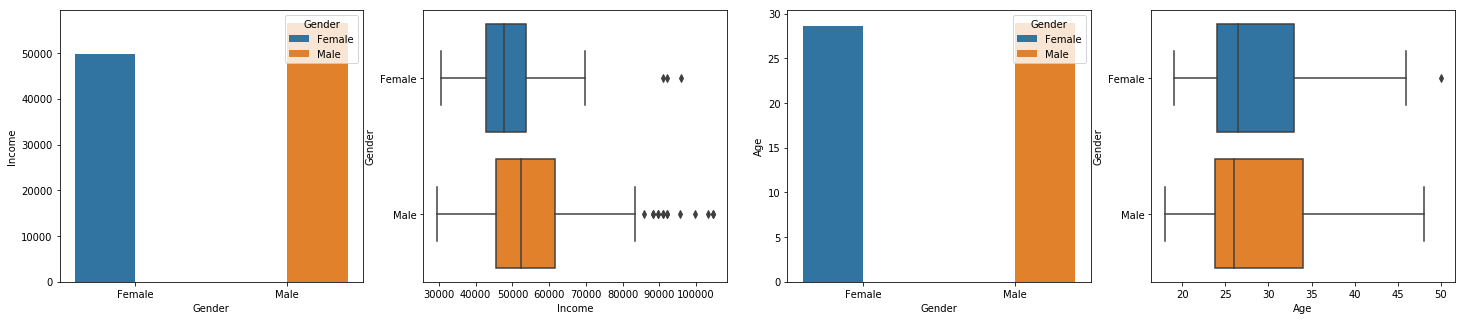

In [37]:
fig, axes = plt.subplots(ncols=4,figsize=(25, 5))
drawCatPlot('Income','Gender', data, 'Gender',axes[0])
drawBoxPlot('Income','Gender',data,axes[1])
drawCatPlot('Age','Gender', data, 'Gender',axes[2])
drawBoxPlot('Age','Gender',data,axes[3])

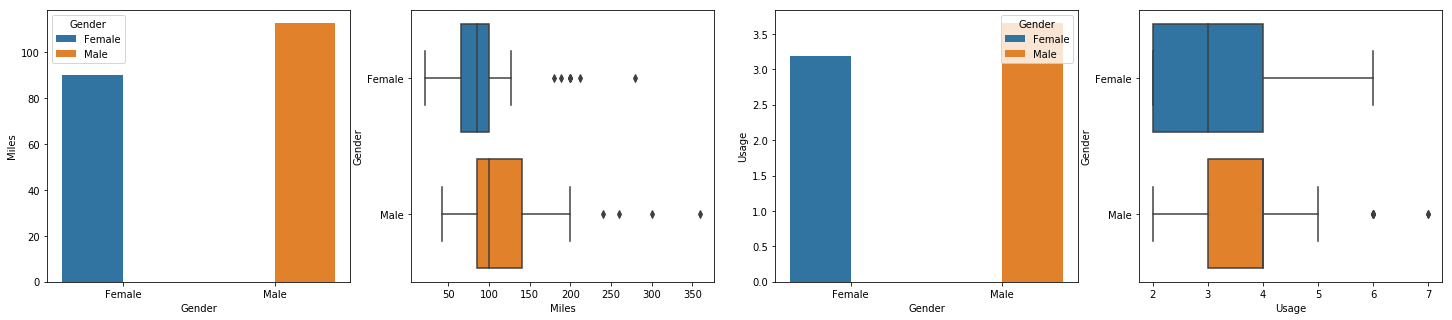

In [38]:
fig, axes = plt.subplots(ncols=4,figsize=(25, 5))
drawCatPlot('Miles','Gender', data, 'Gender',axes[0])
drawBoxPlot('Miles','Gender',data,axes[1])
drawCatPlot('Usage','Gender', data, 'Gender',axes[2])
drawBoxPlot('Usage','Gender',data,axes[3])

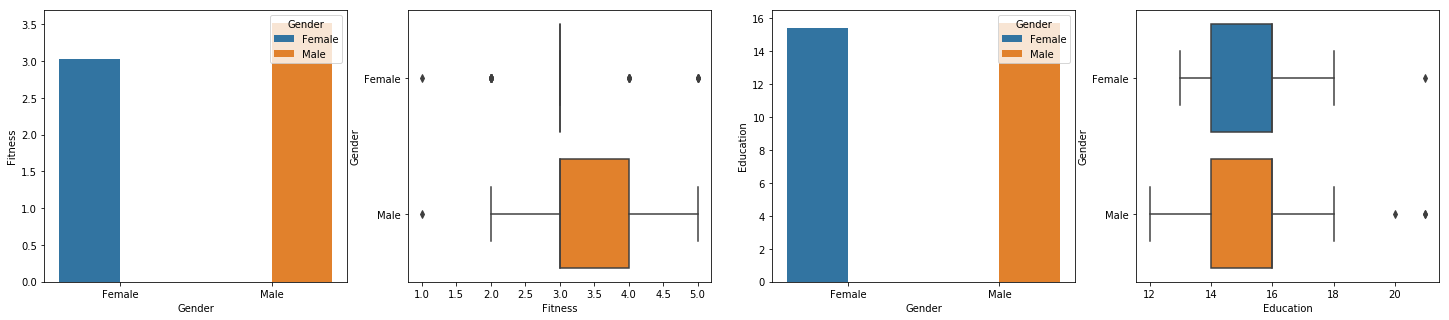

In [39]:
fig, axes = plt.subplots(ncols=4,figsize=(25, 5))
drawCatPlot('Fitness','Gender', data, 'Gender',axes[0])
drawBoxPlot('Fitness','Gender',data,axes[1])
drawCatPlot('Education','Gender', data, 'Gender',axes[2])
drawBoxPlot('Education','Gender',data,axes[3])

**Observation**:-
- Males customers have higher income compared to female customers
- Few female customers have 80+ K outlier salary, whereas many male customers has outlier salary of 80+ K
- Male and Female customers are mostly of same age group 24-35yrs. 
- Few outliers female customers of age around 50 yrs.
- Many male customer have 200+ miles (outliers), few even have more than 350 miles.
- Male customers have fitness level 3-5 , where female customer fitness is less than male customers.
- Male and Female customers have same level of education.

#### Understading correlation between MaritalStatus with Income, Age, Miles, Usage, Fitness, Education

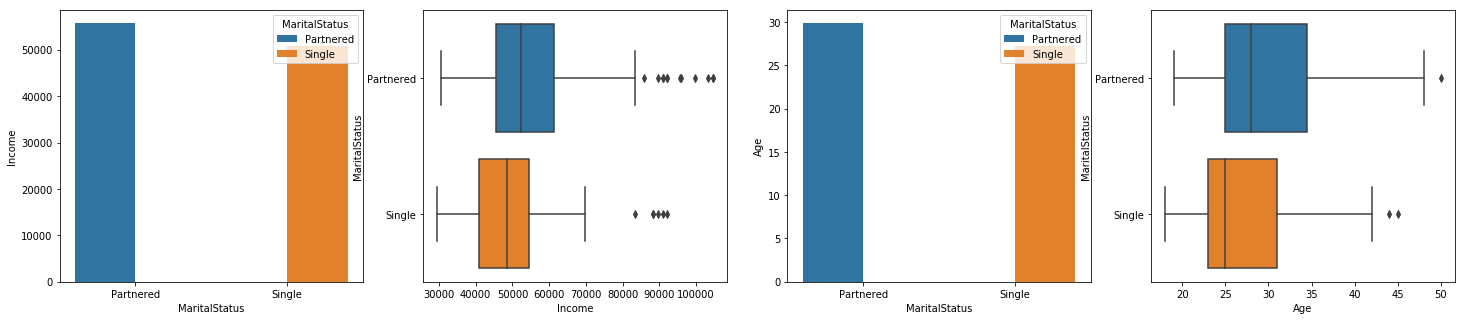

In [40]:
fig, axes = plt.subplots(ncols=4,figsize=(25, 5))
drawCatPlot('Income','MaritalStatus', data, 'MaritalStatus',axes[0])
drawBoxPlot('Income','MaritalStatus',data,axes[1])
drawCatPlot('Age','MaritalStatus', data, 'MaritalStatus',axes[2])
drawBoxPlot('Age','MaritalStatus',data,axes[3])

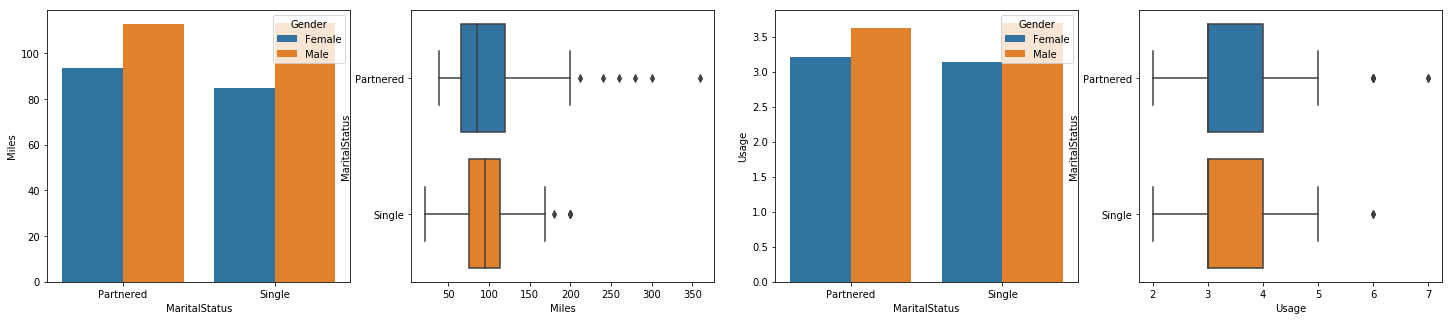

In [41]:
fig, axes = plt.subplots(ncols=4,figsize=(25, 5))
drawCatPlot('Miles','MaritalStatus', data, 'Gender',axes[0])
drawBoxPlot('Miles','MaritalStatus',data,axes[1])
drawCatPlot('Usage','MaritalStatus', data, 'Gender',axes[2])
drawBoxPlot('Usage','MaritalStatus',data,axes[3])

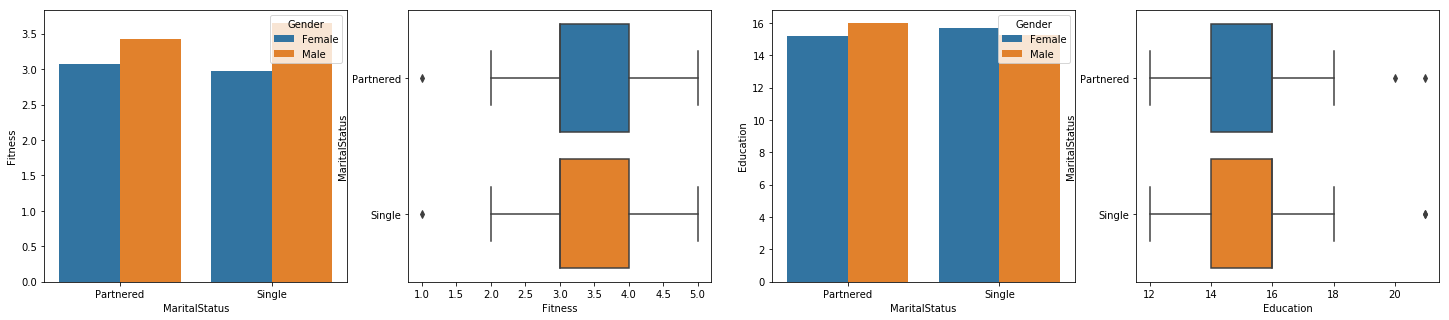

In [42]:
fig, axes = plt.subplots(ncols=4,figsize=(25, 5))
drawCatPlot('Fitness','MaritalStatus', data, 'Gender',axes[0])
drawBoxPlot('Fitness','MaritalStatus',data,axes[1])
drawCatPlot('Education','MaritalStatus', data, 'Gender',axes[2])
drawBoxPlot('Education','MaritalStatus',data,axes[3])

**Observation**:-
- There are many outliers Partnered customers whose income is more than 80K
- Single customers has less income than Partnered Customers
- Single customers has 18-30 yrs, where Partnered customers has 25-35 yrs.
- Some partners customers age is 50+ (outlier)
- Partnered customers has more miles than single customers.
- Partnered customers has outlier miles of 200+
- Single and Partnered customers usage pattern is same
- Single and Partnered customers have same Fitness level
- Single and Partnered customers have same Education level
                                                                                                              )

#### Multi-variate Analyses

#### Correlation between Prodcut, Age and Education

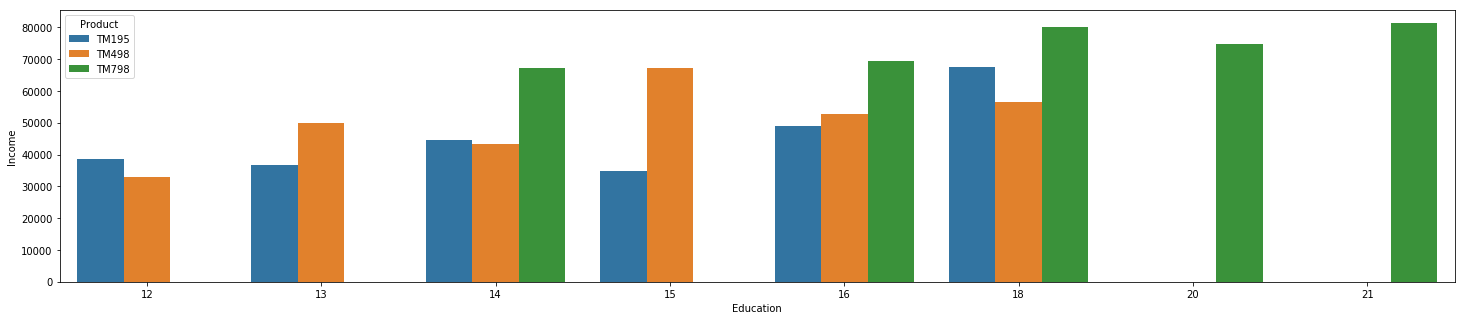

In [43]:
fig, axes = plt.subplots(ncols=1,figsize=(25, 5))
sns.catplot(y='Income',x='Education',hue='Product',kind="bar", data=data, ci=None,ax=axes); 
plt.close(2)

**Observation**:-
- Product TM195 and TM498 is mostly used by customers having salary around 50K and 15 yrs of education.
- TM798 is used by customer mostly who have higher education and income above 65K

#### Correlation between Prodcut, Age and Income

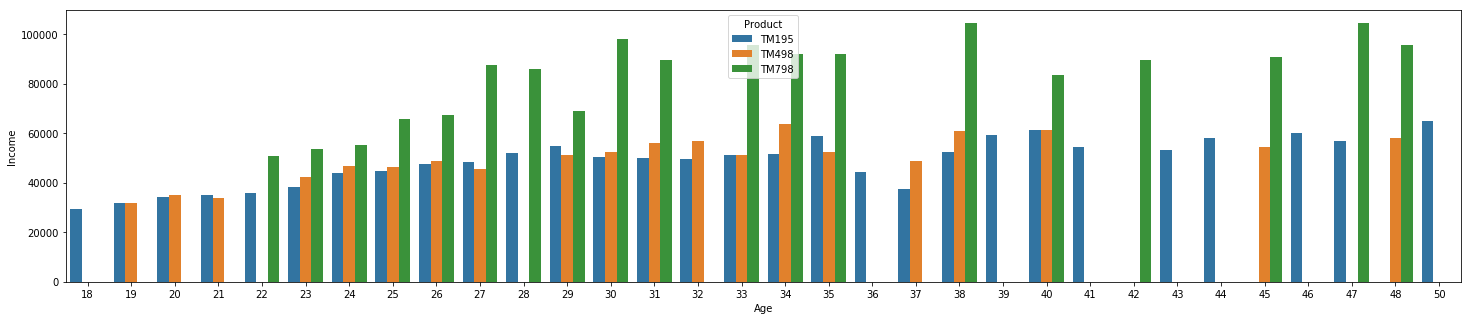

In [44]:
fig, axes = plt.subplots(ncols=1,figsize=(25, 5))
sns.catplot(y='Income',x='Age',hue='Product',kind="bar", data=data, ci=None,ax=axes); 
plt.close(2)


**Observation**:-
- Customer with age less than 23yrs have lesser income and they are mostly buying TM195 and TM498
- Customer with age above  40yrs mostly buying TM195 and TM798

#### Correlation between Prodcut, MartialStatus and Gender

In [45]:
prdCrossTab=pd.crosstab(index=data["Product"], columns=[data["MaritalStatus"],data["Gender"]])
prdCrossTab

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
TM195                27   21     13   19
TM498                15   21     14   10
TM798                 4   19      3   14

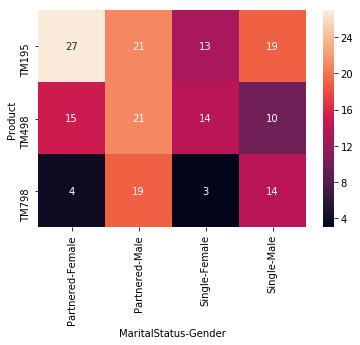

In [46]:
sns.heatmap(prdCrossTab,annot=True, cbar=True);

**Observation**:-
- Product TM798 is mostly used by Male customer with more of male partner customers buying it.
- Prodcut TM195 is mostly bought by partners female cusotmers.
- There are more male cusotmers than female customers
                                                            

#### Correlation between different columns of data

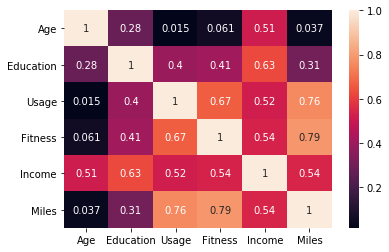

In [47]:
corr=data.corr()
sns.heatmap(corr,annot=True, cbar=True);

**Observation**:-
- There is high relation between Income and Education. ie., Higher education will lead to higer income
- Age and Usage pattern didn't have any considerable relationship between the two
- Age and Income do have relationship between the two. Older age group cusotmer have more income
- Higer usage of Trade mill privides higer fitness level, results in more miles and income.

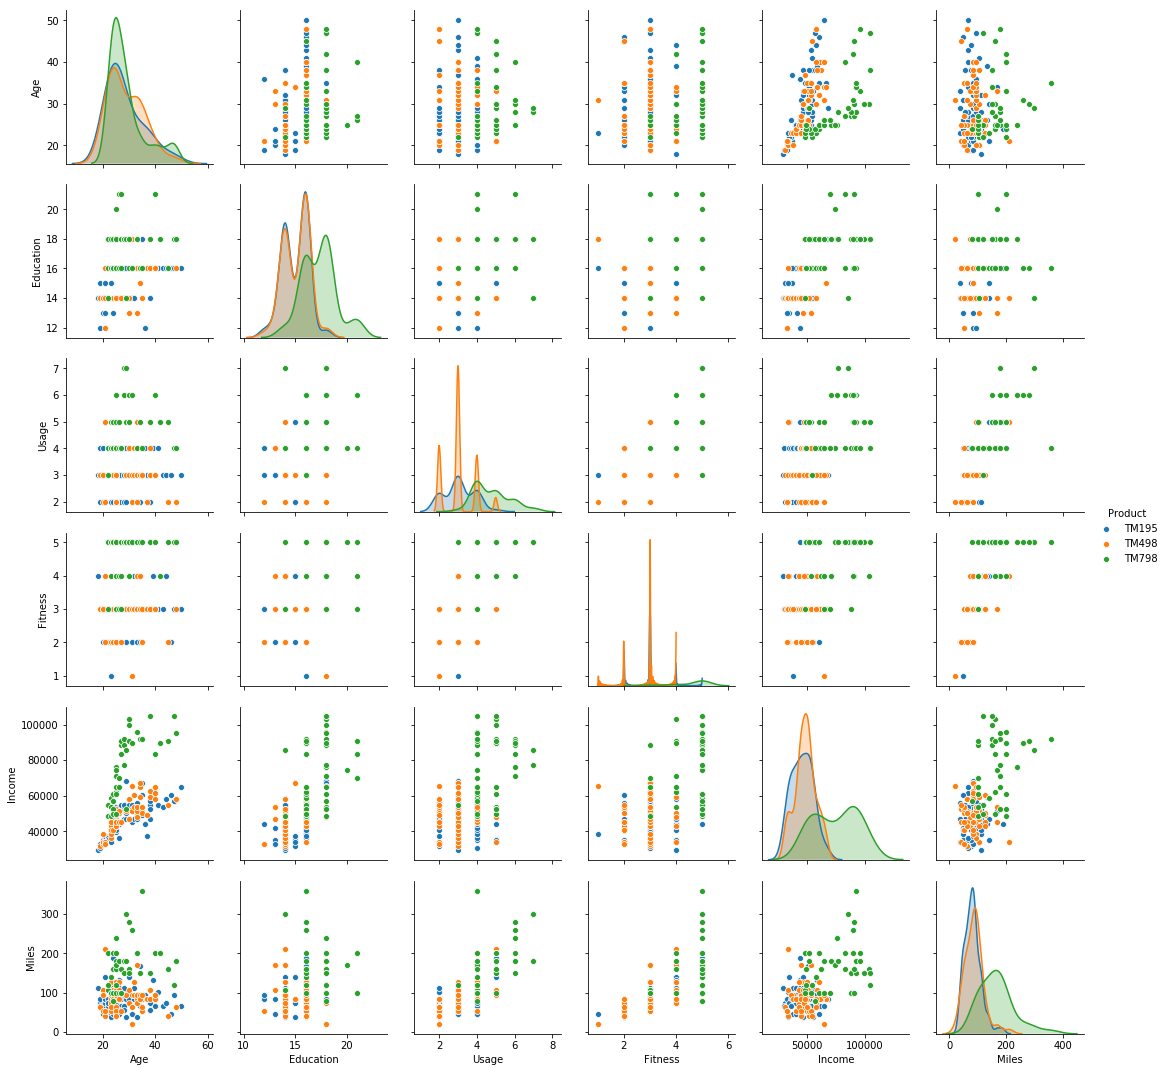

In [48]:
sns.pairplot(data,hue='Product',diag_kind='kde',kind='scatter');

**Observation**:-
- Customers with education 14+ yrs have around 200 miles or more
- Customers with income less than 75K has miles around 100
- Younger age group customers have a consitent pattern of miles around 100 miles
- Customers with age 40+ has income 50K+
- Customers with Higher income is using TM798
- Customers with income greater than 80K have better usage (4+ days a week) pattern.
- Customers with Education above 15+ yrs have higher income, using TM798 mostly, have better fittness rating

### Summary Report

#### Customer Profiles

- TM195
    - Most (44.4%) customer uses this Trademill
    - Average income of customers who bought TM195 is 46418.025.
    - Equal percentage (22.2%) of male and female customers using this Trademill
    - Average age of customer is 28.55yrs who bought this product
    - Average education of customers is 16 yrs.
    - Customers fittness level is 3
    - Customers usage pattern of trademill is 3-4 days of week

- TM498
    - 16.1% Female and 17.2% of Male customers have bought this trademill
    - Average income of customers who bought TM498 is 48973.650
    - Average age of customers are 28.90yrs
    - Average education of customers is 16 yrs.
    - Customers fittness level is 3
    - Customers usage pattern of trademill is 3 days of week
  
- TM798
    - 3.9% Female and 18.3% of Male customers have bought this trademill
    - Average income of customers who bought TM498 is 75441.575
    - Average age of customers are 29.10yrs
    - Average education of customers is 16-18s yrs.
    - Customers fittness level is 4-5
    - Customers usage pattern of trademill is 4-5 days of week


#### Recommendation

- It has been observered that product TM798 is least used product and only 3.9% of female uses it. It is also observed that female customers have less income compared to its counter part male. Inorder to promote uses of this product among female - somekind of discounts can be given to female customers.
- We observed that mostly Male (57.7%) and Female (42.3%) customers bought trademill, this shows that female candidate has lesser participation compared to male, by providing promotional discounts to female candiate we can increase sale of trademills.
- Although TM798 provides higher fitness and more miles, due to its being more costly it has been bought by only customers whose income is more than 65K+. Reason for this could be price being high or lesser awareness about the features of this product. It is recommended to start promotional events - where product features can be helighted and some level of discounts can be given to customers one first come first serve basis.  
- We also noticed that partnered customers have better income - we have created targeted compaign for Partners group of people for promoting TM798.